In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/yugal/Desktop/projects/titanic-analysis/train.csv", index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#Fill null values(to "Unknown")
df.fillna("Unknown")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Unknown,1,2,W./C. 6607,23.4500,Unknown,S


In [49]:
#Total number of passengers for each class

count = df.groupby("Pclass").Pclass.count()

In [11]:
#Total survivers of each class
df.groupby("Pclass").Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [15]:
#Average age of all the passengers
Avg_age = df.Age.mean()
print("Average age of all passengers = ", Avg_age)

Average age of all passengers =  29.69911764705882


In [21]:
#Total male and female passengers
male = (df.Sex == "male").sum()
female = (df.Sex == "female").sum()
print(f"Male passengers = {male} and Female passengers = {female}")

Male passengers = 577 and Female passengers = 314


In [31]:
#Combining SibSp and Parch gives a better representation of family grouping.
df["Family_Size"] = df["SibSp"] + df["Parch"] + 1

df["Alone"] = df["Family_Size"].apply(lambda x: "Yes" if x == 1 else "No")

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,No
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,No
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Yes
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,No
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Yes


In [40]:
#Replacing class from 1,2,3 to First class, Second class and Third class
df["Pclass"] = df.Pclass.replace({1 : "First class", 2 : "Second class", 3 : "Third class"})

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone
PassengerId,,,,,,,,,,,,,
1,0,Third class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,No
2,1,First class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,No
3,1,Third class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Yes
4,1,First class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,No
5,0,Third class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Yes


In [41]:
#Total fare collected from each class
df.groupby("Pclass").Fare.sum()

Pclass
First class     18177.4125
Second class     3801.8417
Third class      6714.6951
Name: Fare, dtype: float64

In [42]:
#Number of passengers from each port
df.groupby("Embarked").Embarked.count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

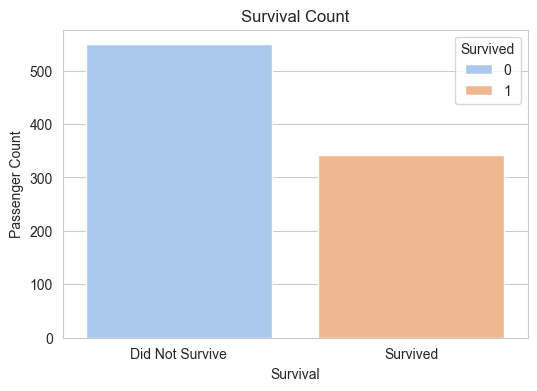

In [88]:
# Plot the survival count
sns.set_style('whitegrid')

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', hue = "Survived" ,palette='pastel')
plt.title('Survival Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Passenger Count')

plt.show()

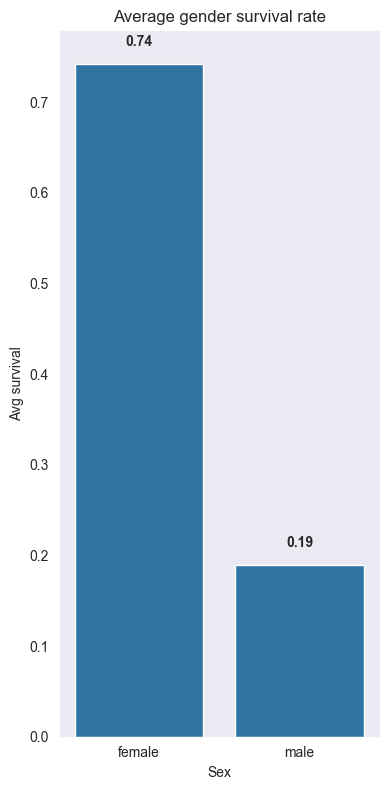

In [90]:
#Survival rate of genders
gender_surviver = df.groupby("Sex").Survived.mean().reset_index()
sns.set_style("dark")

plt.figure(figsize = (4,8))
sns.barplot(data = gender_surviver, x = "Sex", y = "Survived")
plt.title("Average gender survival rate")
for i, val in enumerate(gender_surviver["Survived"]):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontweight='bold')
plt.ylabel("Avg survival")
plt.tight_layout()
plt.show()

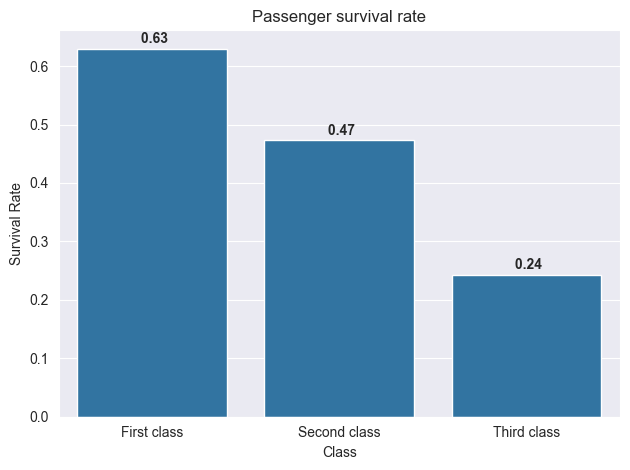

In [99]:
#Survival rate of passenger class
pclass_survival = df.groupby(df.Pclass).Survived.mean().reset_index()
sns.set_style("darkgrid")

sns.barplot(data = pclass_survival, x = "Pclass", y = "Survived")
plt.title("Passenger survival rate")

for i,val in enumerate(pclass_survival["Survived"]):
    plt.text(
        x = i,
        y = val + 0.01,
        s = f"{val: .2f}",
        ha = "center",
        fontweight = "bold"
)
plt.xlabel("Class")
plt.ylabel("Survival Rate")
plt.tight_layout()

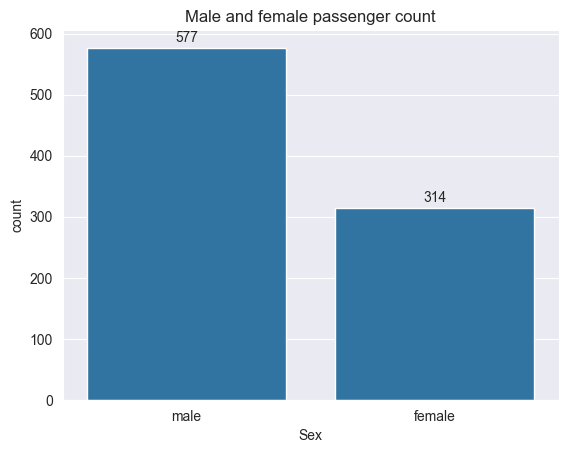

In [128]:
#male and female passenger count
x = sns.countplot(data = df, x = "Sex") 
plt.title("Male and female passenger count")
for i, p in enumerate(x.patches):
    count = p.get_height()
    x.text(
        p.get_x() +p.get_width()/2,
        count + 5,
        f"{int(count)}",
        va = "bottom",
        ha = "center"
    )

<Axes: xlabel='Age', ylabel='Count'>

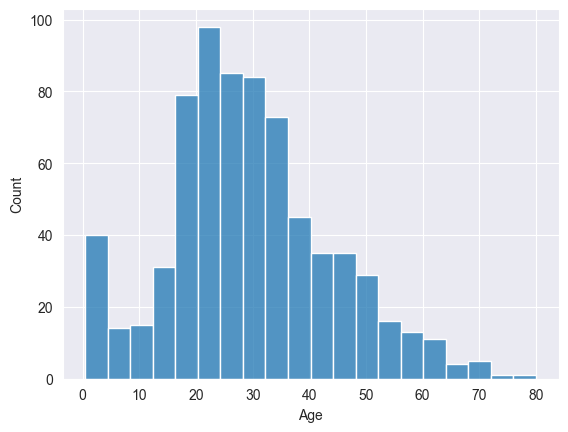

In [129]:
#Age distribution
plt.title("Age distribution")
sns.histplot(df["Age"])

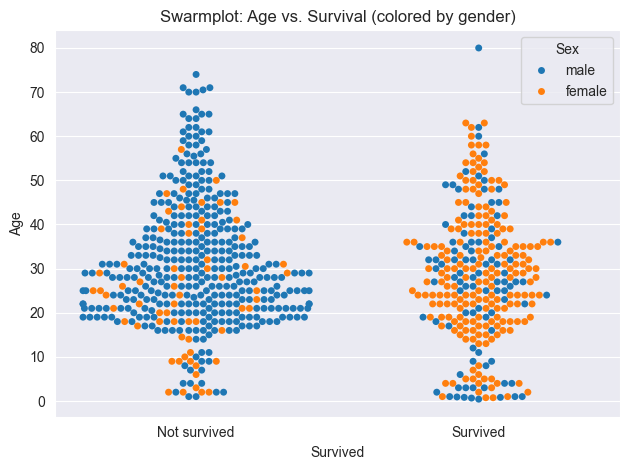

In [140]:
#Swarmplot: Age vs. Survival (colored by gender)
plt.title("Swarmplot: Age vs. Survival (colored by gender)")
sns.swarmplot(data = df,x = "Survived" , y ="Age", hue = "Sex")
plt.xticks([0,1], ["Not survived","Survived"])
plt.tight_layout()

In [ ]:
gitinit